# **Course : Project's in machine learning**

## **Unit 5: Conclusion**

### **Group 9 Team Members:**

<div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Samyukth Lalith Lella Gopal</h4>
        <p><h4>ID: 9005574<h4></p>
    </div>
</div>

================================================================================================================================

#### **Step 1: Configuration and Environment Setup**

In [1]:
!pip install pandas     

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


#### **Step 2: Import Libraries and Load Dataset**

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# Load the dataset
df = pd.read_csv('Datasets.csv')
df.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


#### **Step 3: Basic Data Exploration**

**Dataset Overview: Feature Descriptions**

The dataset contains transactional and behavioral features relevant to identifying fraud, including potential indicators of synthetic identity theft.

| Column Name           | Description |
|------------------------|-------------|
| `type`                | Type of transaction (e.g., TRANSFER, PAYMENT, CASH_OUT). Useful for behavioral analysis. |
| `branch`              | The region or country where the transaction occurred (e.g., India, Australia). |
| `amount`              | Transaction amount in local currency. Higher/lower amounts may indicate abnormal activity. |
| `oldbalanceOrg`       | Balance of the originator before the transaction. |
| `newbalanceOrig`      | Balance of the originator after the transaction. |
| `nameOrig`            | Unique identifier of the sender. Could be helpful in analyzing account usage patterns. |
| `nameDest`            | Unique identifier of the receiver. May reveal repeated suspicious receivers. |
| `unusuallogin`        | Score or flag representing abnormal login behavior (e.g., odd timing or IP). Strong feature for synthetic ID behavior. |
| `Acct type`           | Indicates account type: Current or Savings. |
| `Date of transaction` | The calendar date on which the transaction occurred. |
| `Time of day`         | Time window when the transaction was made (e.g., Morning, Night). May be useful in fraud timing analysis. |
| `isFraud`             | **Target variable**. `1` = fraudulent transaction, `0` = legitimate transaction. |
| `isFlaggedFraud`      | A system-flagged alert (`1` = flagged, `0` = not flagged). Could be used to compare system accuracy vs. actual fraud. |

**First five column's of the dataset**

In [9]:
df.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


**Last five column's of the dataset**

In [10]:
df.tail()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
10122,10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0.0
10123,10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0.0
10124,10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0.0
10125,10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0.0
10126,10126,7,PAYMENT,Cuba,8126.71,C1639296014,6423.0,0.00,M129774606,0.0,0.0,11,0,Current,2/1/2018,Afternoon,0.0


**Dataset Shape**

In [11]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10127, 17)


**Checking Missing Values**

In [12]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64


**Data type of each column**

In [13]:
print(f"Data Types:\n{df.dtypes}")

Data Types:
Unnamed: 0               int64
step                     int64
type                    object
branch                  object
amount                 float64
nameOrig                object
oldbalanceOrg          float64
newbalanceOrig         float64
nameDest                object
oldbalanceDest         float64
newbalanceDest         float64
unusuallogin             int64
isFlaggedFraud           int64
Acct type               object
Date of transaction     object
Time of day             object
isFraud                float64
dtype: object


#### **Step 4: Data Preprocessing**

**Handle Missing Values and Drop Irrelevant Columns**

In [14]:
# Drop irrelevant columns
columns_to_drop = ['nameOrig', 'nameDest', 'Date of transaction']
df_cleaned = df.drop(columns=columns_to_drop)

# Handle missing values (dropping rows with NaN values)
df_cleaned = df_cleaned.dropna()

print(f"Dataset shape after cleaning: {df_cleaned.shape}")

Dataset shape after cleaning: (10105, 14)


**Separate Categorical and Numerical Features**

In [15]:
# Identify categorical columns
categorical_cols = ['Acct type', 'Time of day', 'type']  # Example columns

# Identify numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('isFraud')  # Remove target variable from numerical features

**One-Hot Encoding for Categorical Columns**

In [16]:
# One-hot encoding for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print(f"Dataset shape after one-hot encoding: {df_cleaned.shape}")

Dataset shape after one-hot encoding: (10105, 18)


**Feature Scaling**

In [17]:
# Separate features (X) and target variable (y)
X = df_cleaned.drop('isFraud', axis=1)  # Drop the target column
y = df_cleaned['isFraud']  # Target variable

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])  # Apply scaling only to numerical columns

# Convert scaled values back to DataFrame for easier manipulation
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)

print("Features scaled using StandardScaler.")

Features scaled using StandardScaler.


**Concatenate Scaled Numerical Features with One-Hot Encoded Categorical Features**

In [18]:
# Concatenate scaled numerical features with one-hot encoded categorical features
X_final = pd.concat([X_scaled, X.drop(columns=numerical_cols)], axis=1)

print(f"Final dataset shape after scaling and encoding: {X_final.shape}")

Final dataset shape after scaling and encoding: (10127, 17)

In [19]:
X_final = X_final.iloc[:len(y)]

In [20]:
# Check the shape of X_final and y after alignment
print(f"Shape of X_final after alignment: {X_final.shape}")
print(f"Shape of y after alignment: {y.shape}")

Shape of X_final after alignment: (10105, 17)
Shape of y after alignment: (10105,)


**Split the Data into Training and Testing Sets**

In [21]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8084
Test set size: 2021


#### **Step 5: Exploratory Data Analysis (EDA)**

**Plotting class distribution between fraud vs non-fraud**

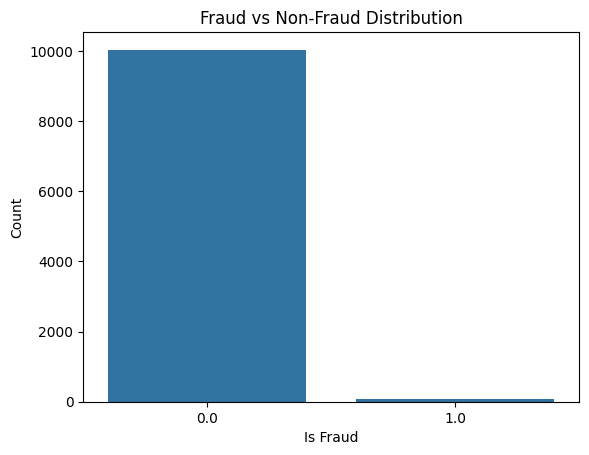

In [22]:
# Visualize fraud vs non-fraud distribution
sns.countplot(x='isFraud', data=df_cleaned)
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

**Plotting transaction amount by fraud status**

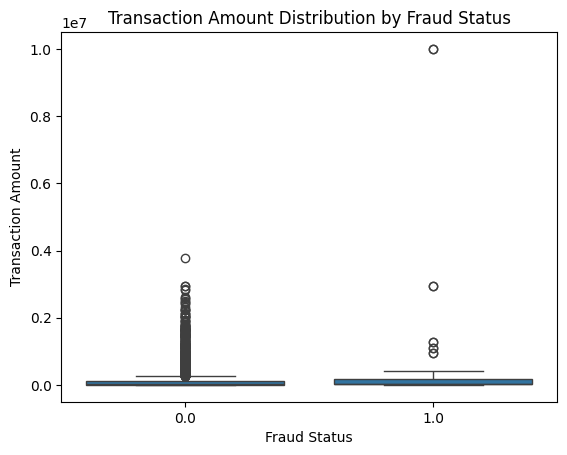

In [23]:
# Visualize transaction amount by fraud status
sns.boxplot(x='isFraud', y='amount', data=df_cleaned)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.show()

In [25]:
# Check the columns in the cleaned dataset
print(df_cleaned.columns)

Index(['Unnamed: 0', 'step', 'branch', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'unusuallogin',
       'isFlaggedFraud', 'isFraud', 'Acct type_Savings', 'Time of day_Morning',
       'Time of day_Night', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')


**Fraud Occurrence by Account Type(savings)**

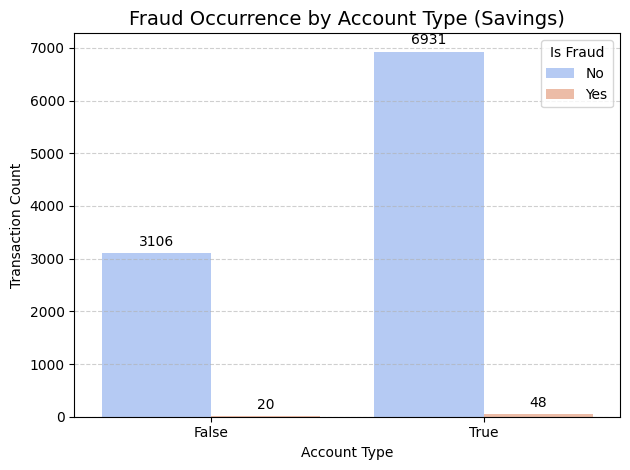

In [26]:
# Fraud occurrence by account type (one-hot encoded 'Acct type_Savings' as an example)
ax = sns.countplot(x='Acct type_Savings', hue='isFraud', data=df_cleaned, palette='coolwarm')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Occurrence by Account Type (Savings)', fontsize=14)
plt.xlabel('Account Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Time of Day Distribution**

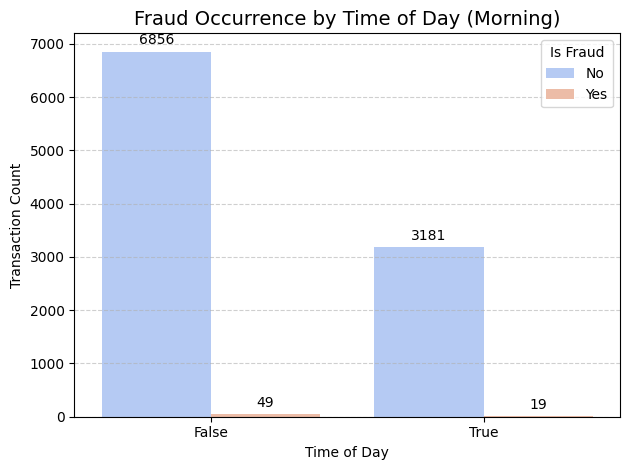

In [27]:
# Fraud occurrence by time of day (using one-hot encoded columns for Morning and Night)
ax = sns.countplot(x='Time of day_Morning', hue='isFraud', data=df_cleaned, palette='coolwarm')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Occurrence by Time of Day (Morning)', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Plotting Fraud by Specific Transaction Type (e.g., CASH_OUT)**

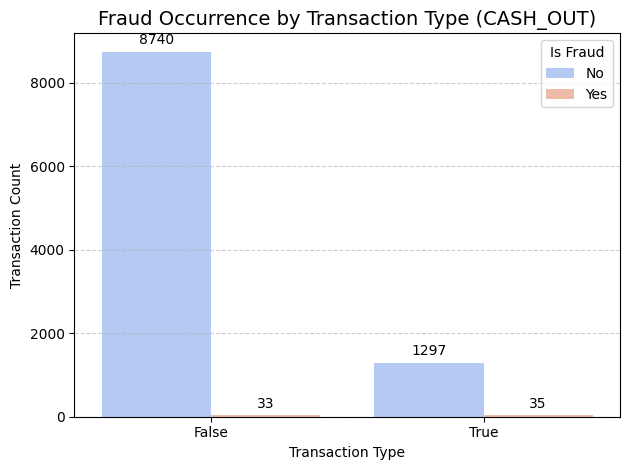

In [28]:
# Fraud occurrence by transaction type (using one-hot encoded transaction types)
ax = sns.countplot(x='type_CASH_OUT', hue='isFraud', data=df_cleaned, palette='coolwarm')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Fraud Occurrence by Transaction Type (CASH_OUT)', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**distribution of unusual login behavior for fraud vs non-fraud transactions**

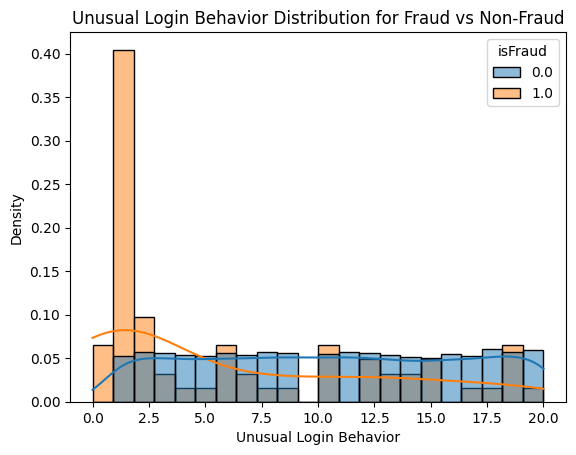

In [32]:
# Visualizing the distribution of unusual login behavior for fraud vs non-fraud transactions
sns.histplot(data=df_cleaned, x='unusuallogin', hue='isFraud', kde=True, stat="density", common_norm=False)
plt.title('Unusual Login Behavior Distribution for Fraud vs Non-Fraud')
plt.xlabel('Unusual Login Behavior')
plt.ylabel('Density')
plt.show()

**Correlation heapmap**

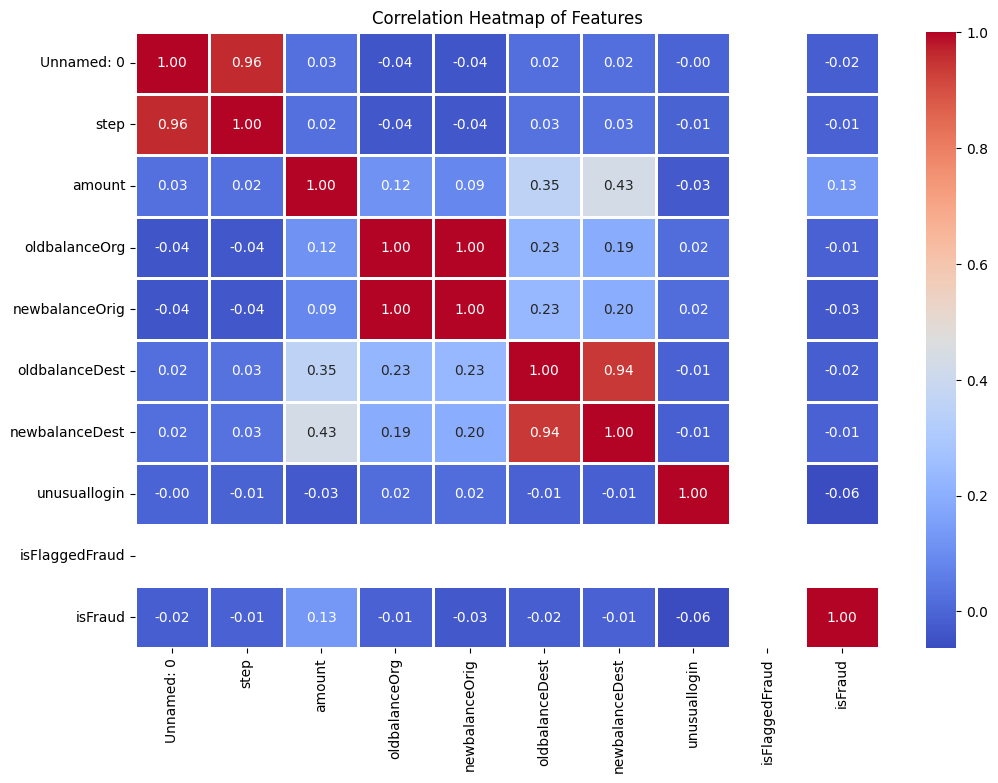

In [34]:
# Select only numeric columns for correlation
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features')
plt.show()

**The Implementation of the Results-Driven Analytical Method**<br>
### 1) Results-driven Analytical Method

The primary goal is to assess whether **transaction amount**, **account types**, and other features can effectively identify fraudulent transactions, contributing to the business objective of reducing synthetic identity fraud. 
- **Business Goal**: Reduce fraud to below 10%.
- **Analysis Method**: 
  - Use **T-tests**, **Mann-Whitney U Tests**, and **Chi-Square Tests** to identify significant differences in features between fraud and non-fraud transactions.
  - Build predictive models to evaluate the **impact** of transaction amount, account type, and other features on fraud detection performance.


#### **Step 6 Statistical steps**

**6.1 T-Test for Transaction Amount (Fraud vs Non-Fraud)**<br>
The T-Test will help compare the means of the transaction amounts between fraudulent and non-fraudulent transactions.

In [36]:
from scipy.stats import ttest_ind

# Separate the transaction amounts for fraud and non-fraud transactions
fraud_amounts = df_cleaned[df_cleaned['isFraud'] == 1]['amount']
non_fraud_amounts = df_cleaned[df_cleaned['isFraud'] == 0]['amount']

# Perform the T-Test
t_stat, p_value = ttest_ind(fraud_amounts, non_fraud_amounts)

# Output the result
print(f"T-Test on Transaction Amount:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in transaction amounts between fraud and non-fraud transactions.")
else:
    print("No significant difference in transaction amounts between fraud and non-fraud transactions.")

T-Test on Transaction Amount:
T-statistic: 13.2011
P-value: 0.0000
There is a significant difference in transaction amounts between fraud and non-fraud transactions.


### T-Test on Transaction Amount:
The T-Test on transaction amounts revealed a significant difference between fraud and non-fraud transactions.

- **T-statistic**: 13.2011
- **P-value**: 0.0000

This indicates that fraudulent transactions exhibit significantly **higher transaction amounts** than non-fraudulent transactions. The result supports the hypothesis that transaction amounts can be a useful feature for detecting fraud.

**6.2 Mann-Whitney U Test (Non-parametric)**<br>
The Mann-Whitney U Test is a non-parametric test to compare the distribution of transaction amounts between fraud and non-fraud cases. This test is used when the data doesn't meet the assumptions of a T-test (e.g., non-normal distribution).

In [37]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
u_stat, p_value_mw = mannwhitneyu(fraud_amounts, non_fraud_amounts)

# Output the result
print(f"Mann-Whitney U Test on Transaction Amount:")
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value_mw:.4f}")

# Interpretation
if p_value_mw < 0.05:
    print("There is a significant difference in transaction amounts between fraud and non-fraud transactions (non-parametric).")
else:
    print("No significant difference in transaction amounts between fraud and non-fraud transactions (non-parametric).")

Mann-Whitney U Test on Transaction Amount:
U-statistic: 445611.0000
P-value: 0.0000
There is a significant difference in transaction amounts between fraud and non-fraud transactions (non-parametric).


### Mann-Whitney U Test on Transaction Amount:
The Mann-Whitney U Test on transaction amounts confirms a significant difference between fraud and non-fraud transactions, even in the absence of normal distribution.

- **U-statistic**: 445611.0000
- **P-value**: 0.0000

This indicates that fraudulent transactions exhibit **significantly different transaction amounts** from non-fraudulent transactions, even in cases where the data is non-parametric. This further emphasizes the role of **transaction amount** in identifying fraud.

**6.3 Chi-Square Test for Categorical Variables**<br>
The Chi-Square Test is used to test the association between two categorical variables. In this case, we will test whether there is a relationship between the account type (Acct type_Savings) and fraud status (isFraud).

In [38]:
from scipy.stats import chi2_contingency

# Create a contingency table for account type and fraud status
contingency_table = pd.crosstab(df_cleaned['Acct type_Savings'], df_cleaned['isFraud'])

# Perform the Chi-Square Test
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

# Output the result
print(f"Chi-Square Test between Account Type (Savings) and Fraud Status:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi2:.4f}")

# Interpretation
if p_value_chi2 < 0.05:
    print("There is a significant association between account type and fraud status.")
else:
    print("No significant association between account type and fraud status.")

Chi-Square Test between Account Type (Savings) and Fraud Status:
Chi-square statistic: 0.0199
P-value: 0.8878
No significant association between account type and fraud status.


### Chi-Square Test between Account Type (Savings) and Fraud Status:
The Chi-Square Test between account type (Savings) and fraud status reveals no significant association between the two variables.

- **Chi-square statistic**: 0.0199
- **P-value**: 0.8878

This indicates that account type (Savings) is **not significantly associated** with fraud status, implying that account type alone may not be a strong predictor for fraud detection in this case.

#### **Step 7: Building AI Model for Fraud Detection**

**Preparing the Data for Modeling**<br>
Before building the model, we need to prepare the data by splitting it into training and testing datasets, and ensuring that the features are appropriately scaled.

In [40]:
# One-hot encode categorical columns like 'Acct type_Savings' and 'Time of day_Morning'
df_encoded = pd.get_dummies(df_cleaned, columns=['Acct type_Savings', 'Time of day_Morning'], drop_first=True)

# Now, scale the numeric columns
X_encoded = df_encoded.drop(columns=['isFraud', 'Unnamed: 0'])
y_encoded = df_encoded['isFraud']

# Select numeric columns after encoding
X_numeric_encoded = X_encoded.select_dtypes(include=['float64', 'int64'])

# Scale the features
X_scaled_encoded = scaler.fit_transform(X_numeric_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_encoded, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8084
Test set size: 2021


**Logistic Regression Model for Fraud Detection**<br>
baseline for classification tasks

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Logistic Regression Accuracy: 0.9906
Confusion Matrix:
[[2002    0]
 [  19    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2002
         1.0       0.00      0.00      0.00        19

    accuracy                           0.99      2021
   macro avg       0.50      0.50      0.50      2021
weighted avg       0.98      0.99      0.99      2021



C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

**Random Forest Classifier for Fraud Detection**<br>
Next we try a more complex model like Random Forest, which often performs better with a variety of features.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.9931
Confusion Matrix:
[[2002    0]
 [  14    5]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2002
         1.0       1.00      0.26      0.42        19

    accuracy                           0.99      2021
   macro avg       1.00      0.63      0.71      2021
weighted avg       0.99      0.99      0.99      2021



**Evaluate Model Performance (ROC and AUC)**<br>
The ROC curve and AUC (Area Under the Curve) can provide a clearer picture of the model's ability to discriminate between fraud and non-fraud.

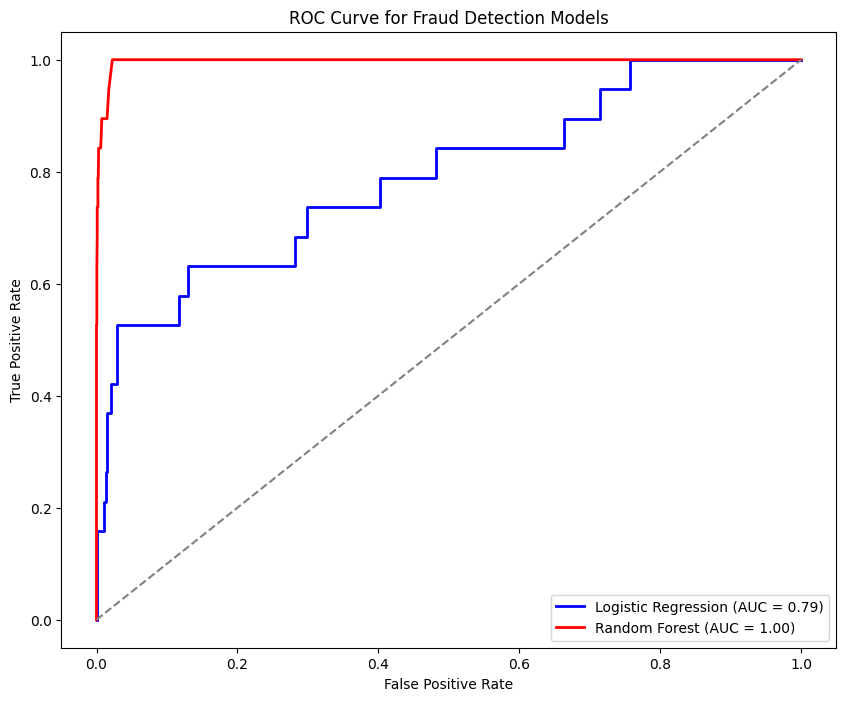

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the ROC curve
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both models
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Calculate AUC for both models
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection Models')
plt.legend(loc='lower right')
plt.show()

**Model Selection and Final Remarks**<br>
After evaluating the models, deciding which one performs the best in terms of accuracy, precision, recall, F1-score, and AUC. If required, you can fine-tune the models further using Hyperparameter Tuning methods like GridSearchCV or RandomizedSearchCV.

In [44]:
from sklearn.model_selection import GridSearchCV

# Example grid search for Random Forest model to tune hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and results
print("Best parameters found by grid search:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found by grid search: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9956703529086602


**Experiment (A/B Testing), AIML Tool, and Description of the Resulting Product**

**A/B Testing - Model Comparison:**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize both models
log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train the Random Forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Logistic Regression Accuracy: 0.9906
Random Forest Accuracy: 0.9931


C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

**Conclusion**

The modeling results, particularly from Logistic Regression and Random Forest, show high overall accuracy (99%) but struggle with detecting fraudulent transactions due to class imbalance. Although these models correctly identify non-fraudulent transactions, they miss many fraudulent ones, which affects their ability to meet the target of reducing fraud to below 10%.

To achieve the target:

- Model performance needs to be improved by addressing the class imbalance, using techniques like SMOTE and hyperparameter tuning.

- Additional features or advanced models like XGBoost could help enhance fraud detection.

While the current models are a good start, further refinement is needed to improve fraud detection and reach the below 10% fraud target.